In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import loadmat

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from funcs.imgproc import get_imgs_designmx, show_stim

In [3]:
stims_design_mx = get_imgs_designmx()
stims_design_mx

{'subj01': array([46002, 61882,   828, ..., 53167,  1943,  5033]),
 'subj02': array([46002, 42019, 22499, ..., 61375, 42647, 69767]),
 'subj03': array([46002, 19256, 36385, ...,  5026, 53735, 29181]),
 'subj04': array([46002, 23081,  8030, ..., 58820,  5945, 44955]),
 'subj05': array([46002,  5736,  9203, ..., 44062, 53237, 54912]),
 'subj06': array([46002, 21396, 18924, ..., 48121, 63633, 17859]),
 'subj07': array([46002, 16506,  9386, ..., 34540, 31243, 55230]),
 'subj08': array([46002, 57483, 41827, ...,  4293, 23655, 29037])}

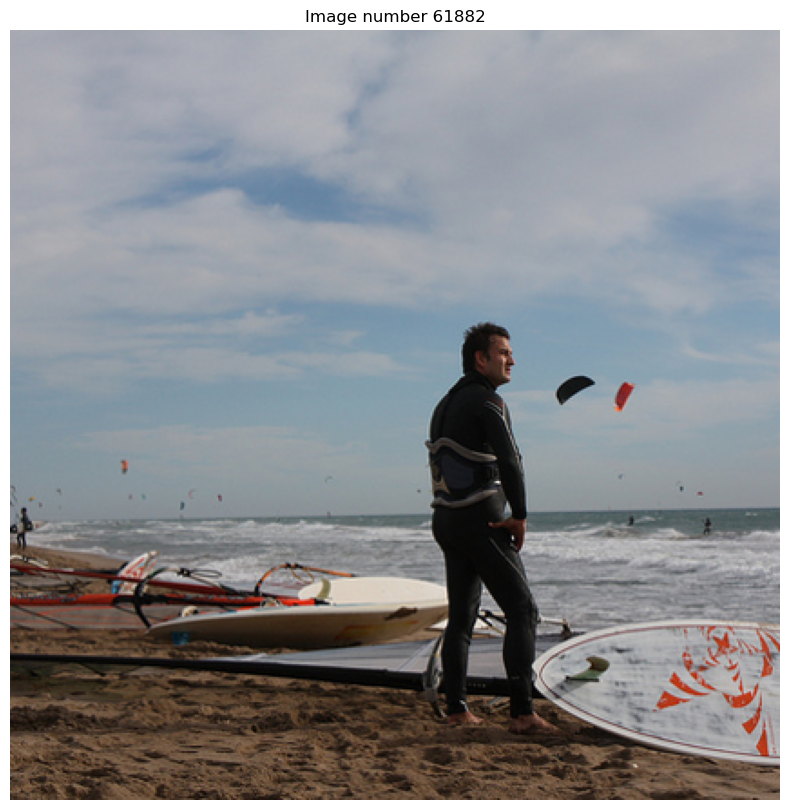

In [135]:
_ = show_stim(img_no = stims_design_mx['subj01'][1])